In [1]:
import pandas as pd
listing_dump = pd.read_excel("Listing_dump(Jan_june_2024).xlsx")
listing_dump.head(1)

,ListingId,CreatedOn,ListingType,City,Locality,PropertyType,ProjectName,CP Code
0,6276714,2024-01-01,Sale,Bhubaneswar,Patia,Villa,\N,SQYCS/CP/340088


In [2]:
lead_dump = pd.read_excel("Lead_dump_analysis.xlsx")
lead_dump.head(1)

,Lead ID,Lead Generation Date,Actual CPcode,Reassignment Date,Current CP Code,Last Activity,ListingId,Listing CreatedOn,Property Type,Listing Type
0,17522230,2024-01-01 00:01:16,SQYCS/CP/263523,\N,SQYCS/CP/263523,\N,5777726,2023-08-24 00:00:00,Builder Floor,RENT


In [ ]:
# Convert date columns to datetime format if they are not already
listing_dump['CreatedOn'] = pd.to_datetime(listing_dump['CreatedOn'])
lead_dump['Lead Generation Date'] = pd.to_datetime(lead_dump['Lead Generation Date'])

In [4]:
# Filter listings created in January 2024
jan_listings = listing_dump[listing_dump['CreatedOn'].dt.month == 1]

# Get the number of unique CP codes for January listings
unique_cp_jan_listings = jan_listings['CP Code'].nunique()

# Filter leads generated in January 2024 for listings created in January 2024
jan_leads = lead_dump[(lead_dump['Lead Generation Date'].dt.month == 1) & (lead_dump['ListingId'].isin(jan_listings['ListingId']))]

# Get the number of unique CP codes for January leads
unique_cp_jan_leads = jan_leads['Actual CPcode'].nunique()

# Get the number of unique listings that have generated leads
listings_with_leads = jan_leads['ListingId'].nunique()

# Display results
print(f"Number of listings created in January 2024: {len(jan_listings)}")
print(f"Number of unique CP codes for January listings: {unique_cp_jan_listings}")
print(f"Number of leads generated in January 2024 for January listings: {len(jan_leads)}")
print(f"Number of unique CP codes for January leads: {unique_cp_jan_leads}")
print(f"Number of listings created in January 2024 that have generated leads: {listings_with_leads}")



Number of listings created in January 2024: 109009
Number of unique CP codes for January listings: 5686
Number of leads generated in January 2024 for January listings: 11812
Number of unique CP codes for January leads: 48
Number of listings created in January 2024 that have generated leads: 7689


In [5]:
# Filter listings created in January 2024
jan_listings = listing_dump[listing_dump['CreatedOn'].dt.month == 1]

# Filter leads generated in January 2024 for January listings
jan_leads = lead_dump[(lead_dump['Lead Generation Date'].dt.month == 1) & (lead_dump['ListingId'].isin(jan_listings['ListingId']))]

# Get the listing IDs that generated leads in January
jan_listings_with_leads = jan_leads['ListingId'].unique()

# Filter out the January listings that already generated leads in January
remaining_jan_listings = jan_listings[~jan_listings['ListingId'].isin(jan_listings_with_leads)]

# Initialize a dictionary to hold the results
results = {}

# Iterate over the months February to June
for month in range(2, 7):
    # Filter leads generated in the current month for the remaining January listings
    month_leads = lead_dump[(lead_dump['Lead Generation Date'].dt.month == month) & (lead_dump['ListingId'].isin(remaining_jan_listings['ListingId']))]
    
    # Get the number of unique CP codes for the current month leads
    unique_cp_month_leads = month_leads['Actual CPcode'].nunique()
    
    # Get the number of unique listings that have generated leads in the current month
    listings_with_leads_month = month_leads['ListingId'].nunique()
    
    # Store the results in the dictionary
    results[month] = {
        'Number of leads': len(month_leads),
        'Number of unique listings with leads': listings_with_leads_month,
        'Number of unique CP codes': unique_cp_month_leads
    }

# Display results
for month, data in results.items():
    month_name = pd.to_datetime(f'2024-{month}-01').strftime('%B')
    print(f"Results for {month_name} 2024:")
    print(f"Number of leads: {data['Number of leads']}")
    print(f"Number of unique listings with leads: {data['Number of unique listings with leads']}")
    print(f"Number of unique CP codes: {data['Number of unique CP codes']}")
    print("\n")


Results for February 2024:
Number of leads: 14444
Number of unique listings with leads: 9806
Number of unique CP codes: 0


Results for March 2024:
Number of leads: 10311
Number of unique listings with leads: 7556
Number of unique CP codes: 0


Results for April 2024:
Number of leads: 8193
Number of unique listings with leads: 6233
Number of unique CP codes: 0


Results for May 2024:
Number of leads: 9514
Number of unique listings with leads: 6782
Number of unique CP codes: 0


Results for June 2024:
Number of leads: 9504
Number of unique listings with leads: 6618
Number of unique CP codes: 0




In [6]:
# Filter listings created in January 2024
jan_listings = listing_dump[listing_dump['CreatedOn'].dt.month == 1]

# Filter leads generated in January 2024 for January listings
jan_leads = lead_dump[(lead_dump['Lead Generation Date'].dt.month == 1) & (lead_dump['ListingId'].isin(jan_listings['ListingId']))]

# Get the listing IDs that generated leads in January
jan_listings_with_leads = jan_leads['ListingId'].unique()

# Initialize a dictionary to hold the results
results = {}

# Initialize the remaining listings excluding those that generated leads in January
remaining_listings = jan_listings[~jan_listings['ListingId'].isin(jan_listings_with_leads)]

# Iterate over the months February to June
for month in range(2, 7):
    # Filter leads generated in the current month for the remaining listings
    month_leads = lead_dump[(lead_dump['Lead Generation Date'].dt.month == month) & (lead_dump['ListingId'].isin(remaining_listings['ListingId']))]
    
    # Get the number of unique CP codes for the current month leads
    unique_cp_month_leads = month_leads['Actual CPcode'].nunique()
    
    # Get the number of unique listings that have generated leads in the current month
    listings_with_leads_month = month_leads['ListingId'].nunique()
    
    # Store the results in the dictionary
    results[month] = {
        'Number of leads': len(month_leads),
        'Number of unique listings with leads': listings_with_leads_month,
        'Number of unique CP codes': unique_cp_month_leads
    }
    
    # Update the remaining listings by excluding those that generated leads in the current month
    remaining_listings = remaining_listings[~remaining_listings['ListingId'].isin(month_leads['ListingId'])]

# Display results
for month, data in results.items():
    month_name = pd.to_datetime(f'2024-{month}-01').strftime('%B')
    print(f"Results for {month_name} 2024:")
    print(f"Number of leads: {data['Number of leads']}")
    print(f"Number of unique listings with leads: {data['Number of unique listings with leads']}")
    print(f"Number of unique CP codes: {data['Number of unique CP codes']}")
    print("\n")


Results for February 2024:
Number of leads: 14444
Number of unique listings with leads: 9806
Number of unique CP codes: 0


Results for March 2024:
Number of leads: 5638
Number of unique listings with leads: 4742
Number of unique CP codes: 0


Results for April 2024:
Number of leads: 3456
Number of unique listings with leads: 3083
Number of unique CP codes: 0


Results for May 2024:
Number of leads: 3141
Number of unique listings with leads: 2797
Number of unique CP codes: 0


Results for June 2024:
Number of leads: 2555
Number of unique listings with leads: 2298
Number of unique CP codes: 0




C:\Python 3.11.5\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Python 3.11.5\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Python 3.11.5\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Python 3.11.5\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Pytho

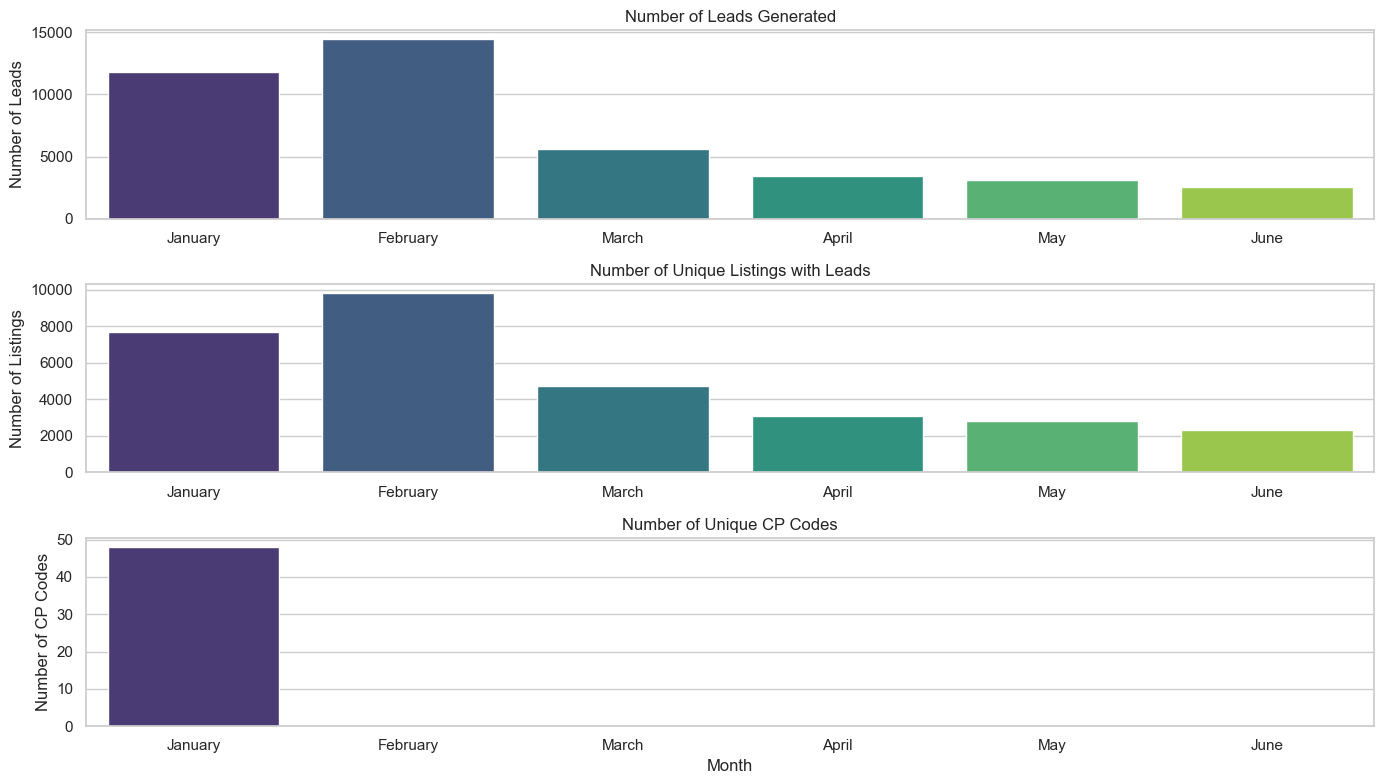

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Filter listings created in January 2024
jan_listings = listing_dump[listing_dump['CreatedOn'].dt.month == 1]

# Filter leads generated in January 2024 for January listings
jan_leads = lead_dump[(lead_dump['Lead Generation Date'].dt.month == 1) & (lead_dump['ListingId'].isin(jan_listings['ListingId']))]

# Get the listing IDs that generated leads in January
jan_listings_with_leads = jan_leads['ListingId'].unique()

# Initialize a dictionary to hold the results
results = {
    'Month': ['January'],
    'Number of leads': [len(jan_leads)],
    'Number of unique listings with leads': [jan_leads['ListingId'].nunique()],
    'Number of unique CP codes': [jan_leads['Actual CPcode'].nunique()],
}

# Initialize the remaining listings excluding those that generated leads in January
remaining_listings = jan_listings[~jan_listings['ListingId'].isin(jan_listings_with_leads)]

# Iterate over the months February to June
for month in range(2, 7):
    # Filter leads generated in the current month for the remaining listings
    month_leads = lead_dump[(lead_dump['Lead Generation Date'].dt.month == month) & (lead_dump['ListingId'].isin(remaining_listings['ListingId']))]
    
    # Get the number of unique CP codes for the current month leads
    unique_cp_month_leads = month_leads['Actual CPcode'].nunique()
    
    # Get the number of unique listings that have generated leads in the current month
    listings_with_leads_month = month_leads['ListingId'].nunique()
    
    # Update the results dictionary
    month_name = pd.to_datetime(f'2024-{month}-01').strftime('%B')
    results['Month'].append(month_name)
    results['Number of leads'].append(len(month_leads))
    results['Number of unique listings with leads'].append(listings_with_leads_month)
    results['Number of unique CP codes'].append(unique_cp_month_leads)
    
    # Update the remaining listings by excluding those that generated leads in the current month
    remaining_listings = remaining_listings[~remaining_listings['ListingId'].isin(month_leads['ListingId'])]

# Convert results dictionary to DataFrame
results_df = pd.DataFrame(results)

# Plot the results
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# Plot the number of leads
plt.subplot(3, 1, 1)
sns.barplot(x='Month', y='Number of leads', data=results_df, palette='viridis')
plt.title('Number of Leads Generated')
plt.xlabel('')
plt.ylabel('Number of Leads')

# Plot the number of unique listings with leads
plt.subplot(3, 1, 2)
sns.barplot(x='Month', y='Number of unique listings with leads', data=results_df, palette='viridis')
plt.title('Number of Unique Listings with Leads')
plt.xlabel('')
plt.ylabel('Number of Listings')

# Plot the number of unique CP codes
plt.subplot(3, 1, 3)
sns.barplot(x='Month', y='Number of unique CP codes', data=results_df, palette='viridis')
plt.title('Number of Unique CP Codes')
plt.xlabel('Month')
plt.ylabel('Number of CP Codes')

plt.tight_layout()
plt.show()


C:\Python 3.11.5\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Python 3.11.5\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Python 3.11.5\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Python 3.11.5\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


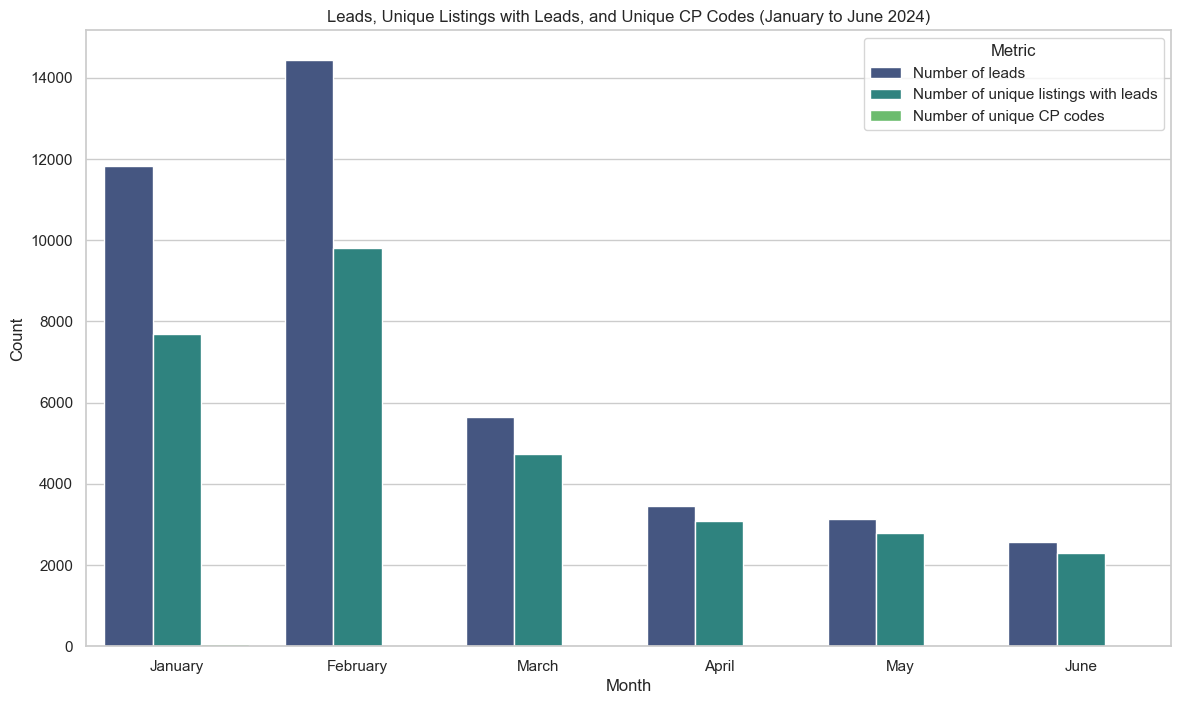

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter listings created in January 2024
jan_listings = listing_dump[listing_dump['CreatedOn'].dt.month == 1]

# Filter leads generated in January 2024 for January listings
jan_leads = lead_dump[(lead_dump['Lead Generation Date'].dt.month == 1) & (lead_dump['ListingId'].isin(jan_listings['ListingId']))]

# Get the listing IDs that generated leads in January
jan_listings_with_leads = jan_leads['ListingId'].unique()

# Initialize a dictionary to hold the results
results = {
    'Month': ['January'],
    'Number of leads': [len(jan_leads)],
    'Number of unique listings with leads': [jan_leads['ListingId'].nunique()],
    'Number of unique CP codes': [jan_leads['Actual CPcode'].nunique()],
}

# Initialize the remaining listings excluding those that generated leads in January
remaining_listings = jan_listings[~jan_listings['ListingId'].isin(jan_listings_with_leads)]

# Iterate over the months February to June
for month in range(2, 7):
    # Filter leads generated in the current month for the remaining listings
    month_leads = lead_dump[(lead_dump['Lead Generation Date'].dt.month == month) & (lead_dump['ListingId'].isin(remaining_listings['ListingId']))]
    
    # Get the number of unique CP codes for the current month leads
    unique_cp_month_leads = month_leads['Actual CPcode'].nunique()
    
    # Get the number of unique listings that have generated leads in the current month
    listings_with_leads_month = month_leads['ListingId'].nunique()
    
    # Update the results dictionary
    month_name = pd.to_datetime(f'2024-{month}-01').strftime('%B')
    results['Month'].append(month_name)
    results['Number of leads'].append(len(month_leads))
    results['Number of unique listings with leads'].append(listings_with_leads_month)
    results['Number of unique CP codes'].append(unique_cp_month_leads)
    
    # Update the remaining listings by excluding those that generated leads in the current month
    remaining_listings = remaining_listings[~remaining_listings['ListingId'].isin(month_leads['ListingId'])]

# Convert results dictionary to DataFrame
results_df = pd.DataFrame(results)

# Melt the DataFrame for easier plotting with seaborn
results_melted = pd.melt(results_df, id_vars=['Month'], var_name='Metric', value_name='Count')

# Plot the results
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# Create a grouped barplot
sns.barplot(x='Month', y='Count', hue='Metric', data=results_melted, palette='viridis')

plt.title('Leads, Unique Listings with Leads, and Unique CP Codes (January to June 2024)')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Metric')
plt.show()
